In [2]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Téléchargement du dataset depuis UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", 
    "marital_status", "occupation", "relationship", "race", 
    "sex", "capital_gain", "capital_loss", "hours_per_week", 
    "native_country", "income"
]
data = pd.read_csv(url, header=None, names=columns, na_values=" ?", skipinitialspace=True)


In [6]:
# Nettoyage des données
print("Avant nettoyage :")
print(data.isnull().sum())
data.dropna(inplace=True)
print("\nAprès nettoyage :")
print(data.isnull().sum())

# Conversion des variables catégoriques en numériques
for col in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Séparation des features et de la cible
X = data.drop(columns=["income"])
y = data["income"]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Avant nettoyage :
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Après nettoyage :
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [8]:
# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialisation des modèles
models = {
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Test des modèles
results = []
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    results.append({"Model": name, "Accuracy": accuracy})

# Résultats
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("Résumé des performances des modèles :")
print(results_df)

--- SVM ---
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7455
           1       0.76      0.55      0.64      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

--- Logistic Regression ---
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7455
           1       0.71      0.45      0.55      2314

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769

--- Random Forest ---
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7455
           1       0.74      0.62      0.67      2314

    accuracy                           0.86      9769
   macro avg       0.

/var/folders/2v/4bnq34cj15n_t9kjf8n9jd680000gn/T/ipykernel_69723/4025415289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


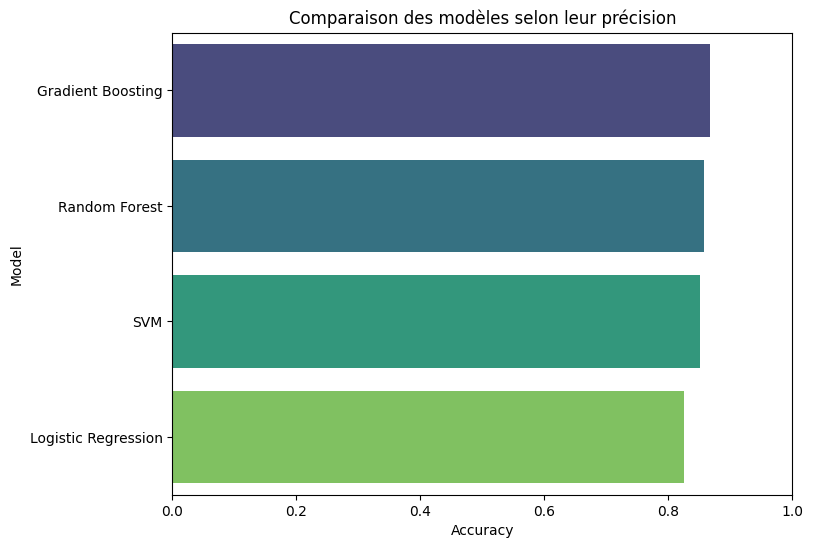

In [10]:
# Visualisation des performances
plt.figure(figsize=(8, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Comparaison des modèles selon leur précision")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()

Rapport de classification :
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7455
           1       0.79      0.60      0.68      2314

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769


Importances des caractéristiques :
           Feature  Importance
7     relationship    0.346689
10    capital_gain    0.217419
4    education_num    0.199693
0              age    0.068183
11    capital_loss    0.061470
12  hours_per_week    0.038673
5   marital_status    0.028592
6       occupation    0.023720
1        workclass    0.005647
9              sex    0.003869
2           fnlwgt    0.003811
13  native_country    0.001569
8             race    0.000661
3        education    0.000003


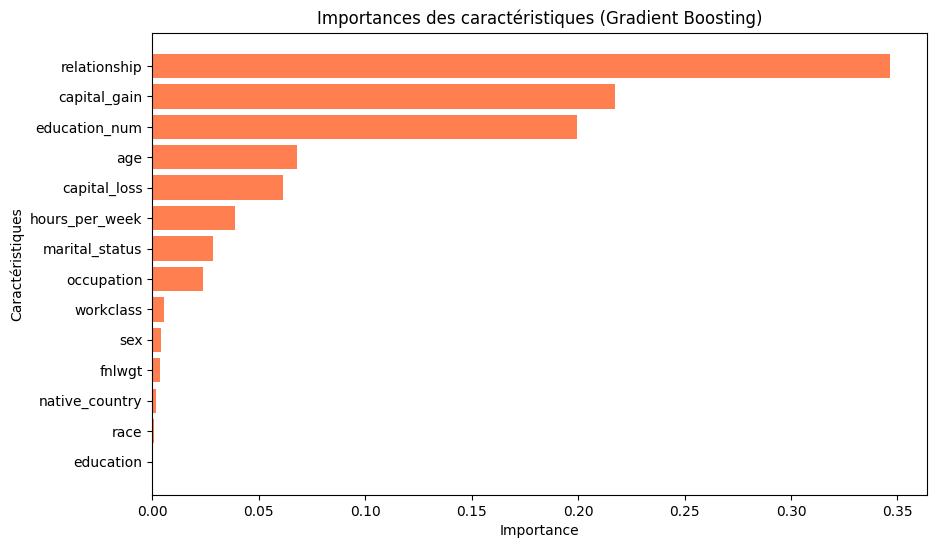

In [12]:
# Gradient Boosting et importance des caractéristiques
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Rapport de classification :")
print(classification_report(y_test, y_pred_gb))

# Importances des caractéristiques
feature_importances = pd.DataFrame({
    "Feature": columns[:-1],
    "Importance": gb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nImportances des caractéristiques :")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="coral")
plt.gca().invert_yaxis()
plt.title("Importances des caractéristiques (Gradient Boosting)")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.show()

In [14]:
# Recherche des meilleurs hyperparamètres avec GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="accuracy",
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("\nMeilleurs paramètres :", grid_search.best_params_)

best_gb = grid_search.best_estimator_
y_pred_optimized = best_gb.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"\nAccuracy après optimisation : {optimized_accuracy:.2f}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda

KeyboardInterrupt: 